In [1]:
import pandas as pd
import numpy as np
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [6]:
df = pd.read_json('D:\PROFIL\BCRK1417\Documents\Parcours_FEST\work\codes\de_satisfaction_client\data\df_commentaires_par_agence.json')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company_name     154 non-null    object
 1   User             154 non-null    object
 2   localisation     154 non-null    object
 3   Titre            154 non-null    object
 4   commentaire      154 non-null    object
 5   nombre_reviews   154 non-null    object
 6   date_experience  154 non-null    object
 7   reply            83 non-null     object
dtypes: object(8)
memory usage: 9.8+ KB


In [8]:
df.isnull().sum()

company_name        0
User                0
localisation        0
Titre               0
commentaire         0
nombre_reviews      0
date_experience     0
reply              71
dtype: int64

In [9]:
df.columns

Index(['company_name', 'User', 'localisation', 'Titre', 'commentaire',
       'nombre_reviews', 'date_experience', 'reply'],
      dtype='object')

In [18]:
text_df = df.drop(['company_name','User', 'localisation', 'Titre', 
       'nombre_reviews', 'date_experience', 'reply'
       ], axis=1)
text_df.head()

,commentaire
0,We wanted to extend our gratitude to the excep...
1,I was anxious when I called egcu.org on Monday...
2,Some of the most help and friends people I kno...
3,I have been with Evergreen Credit Union for ma...
4,I called the Evergreen's Portland location on ...


In [19]:
text_df.rename(columns={'commentaire': 'text'}, inplace=True)
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

We wanted to extend our gratitude to the exceptional team that works at the Riverside Evergreen Credit Union branch. The atmosphere promoted at ECU is inviting, friendly, professional, efficient, and caring. Whether you are making a deposit, lost your debit card, or are taking out a loan... you will be taken care of by this incredibly accommodating and lovely team.

Thank you for the many years of exceptional service! 

I was anxious when I called egcu.org on Monday March 30, 2024. I spoke with Sara Adams and an IT person (Paul?). Sara is an asset to the establishment, helpful and knowledgeable. I want this commendation to be part of her permanent personnel record and for her to be recognized for her fast, courteous service! Thank you Sara.
Linda A. McCann 

Some of the most help and friends people I know easy to find and allways smiling to see U and good to know what I was doing 

I have been with Evergreen Credit Union for many, many years and look forward to many more years. in all 

In [20]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    154 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [21]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
text_df.text = text_df['text'].apply(data_processing)

In [23]:
text_df = text_df.drop_duplicates('text')

In [24]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [25]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [26]:
text_df.head()

,text
0,We wanted to extend our gratitude to the excep...
1,I was anxious when I called egcu.org on Monday...
2,Some of the most help and friends people I kno...
3,I have been with Evergreen Credit Union for ma...
4,I called the Evergreen's Portland location on ...


In [27]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

We wanted to extend our gratitude to the exceptional team that works at the Riverside Evergreen Credit Union branch. The atmosphere promoted at ECU is inviting, friendly, professional, efficient, and caring. Whether you are making a deposit, lost your debit card, or are taking out a loan... you will be taken care of by this incredibly accommodating and lovely team.

Thank you for the many years of exceptional service! 

I was anxious when I called egcu.org on Monday March 30, 2024. I spoke with Sara Adams and an IT person (Paul?). Sara is an asset to the establishment, helpful and knowledgeable. I want this commendation to be part of her permanent personnel record and for her to be recognized for her fast, courteous service! Thank you Sara.
Linda A. McCann 

Some of the most help and friends people I know easy to find and allways smiling to see U and good to know what I was doing 

I have been with Evergreen Credit Union for many, many years and look forward to many more years. in all 

In [28]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 153
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    144 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB


In [29]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [30]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [31]:
text_df.head(10)

,text,polarity
0,We wanted to extend our gratitude to the excep...,0.553571
1,I was anxious when I called egcu.org on Monday...,0.233333
2,Some of the most help and friends people I kno...,0.544444
3,I have been with Evergreen Credit Union for ma...,0.506364
4,I called the Evergreen's Portland location on ...,0.075000
5,Denise Manchester was very helpful and I’m gla...,0.350000
6,I have spoken with Lilly twice in two days. Li...,0.437500
7,Thank you so much for helping me out ☺️🙏🙏🙏☺️☺️...,0.200000
8,My call to Member Services was answered immedi...,0.021429
9,Useful,0.300000


In [32]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [33]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [34]:
text_df.head()

,text,polarity,sentiment
0,We wanted to extend our gratitude to the excep...,0.553571,Positive
1,I was anxious when I called egcu.org on Monday...,0.233333,Positive
2,Some of the most help and friends people I kno...,0.544444,Positive
3,I have been with Evergreen Credit Union for ma...,0.506364,Positive
4,I called the Evergreen's Portland location on ...,0.075000,Positive


<AxesSubplot: xlabel='sentiment', ylabel='count'>

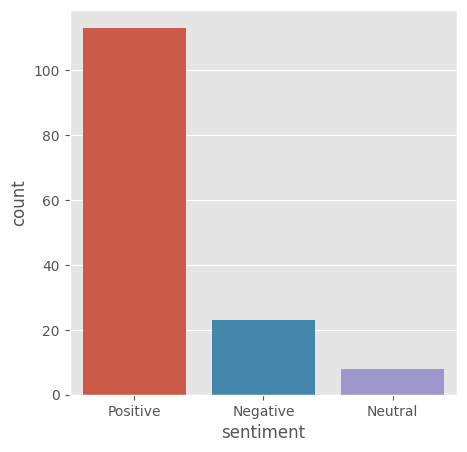

In [35]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

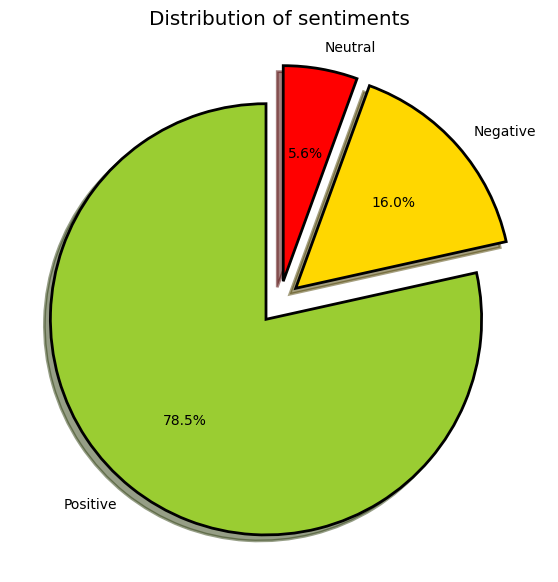

In [36]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [37]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
43,This app is literally the best app I’ve ever g...,1.000000,Positive
87,Best app for managing finances for students/ p...,1.000000,Positive
52,Excellent app. My daughter is doing great with...,0.900000,Positive
49,Easy to use and a great learning instrument!,0.716667,Positive
29,Liberty First did a great job keeping us infor...,0.683333,Positive


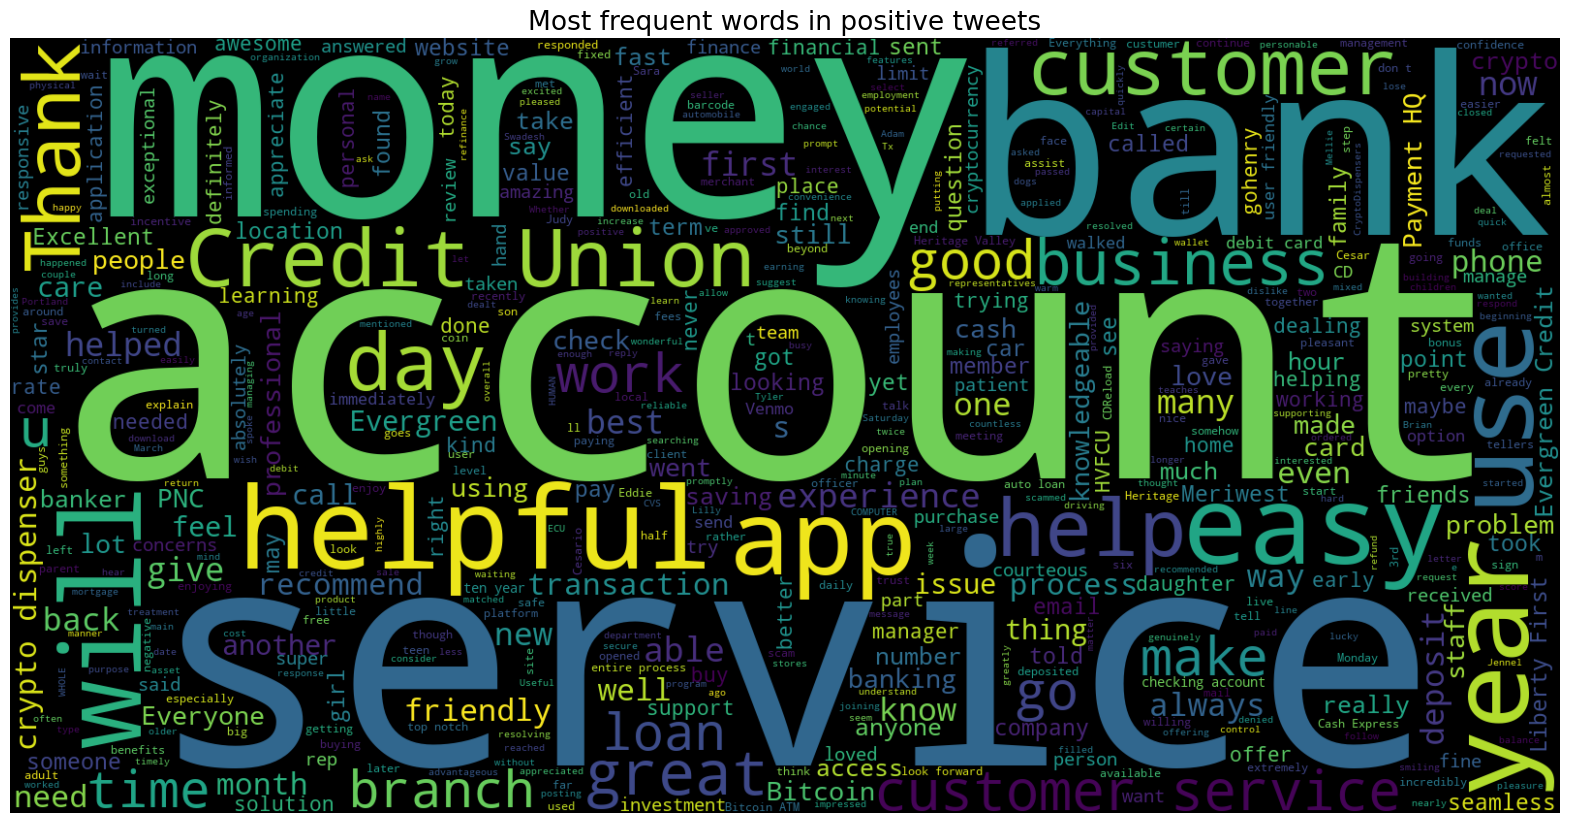

In [38]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [39]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
59,I don’t like how they just take money from my ...,-0.006481,Negative
124,I have been a customer of HVFCU for over 17 ye...,-0.020000,Negative
69,"i have one suggestion, you should also accept ...",-0.041667,Negative
146,"Overall experience, not just a recent visit: T...",-0.070000,Negative
47,Customer service is generally poor. It’s a bit...,-0.075000,Negative


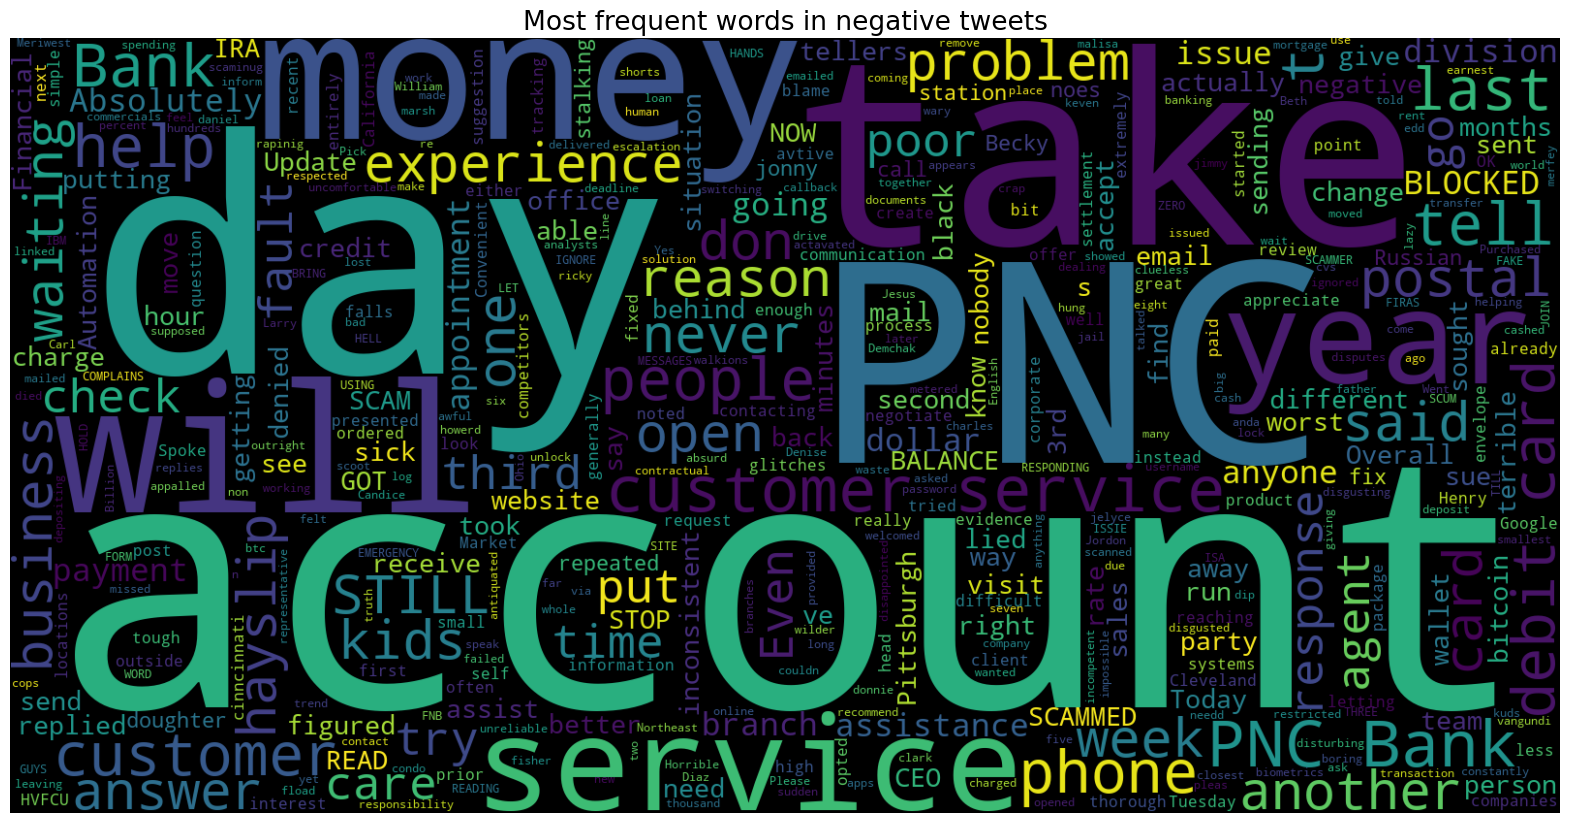

In [40]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [41]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
101,time for __proto__.asdf\nbh,0.0,Neutral
105,25% fees not documented anywhere. Avoid at ALL...,0.0,Neutral
107,Ayat Rilestet Apartment,0.0,Neutral
108,My app is fell I need to renew,0.0,Neutral
109,This daniel hayslip this my account won't cops...,0.0,Neutral


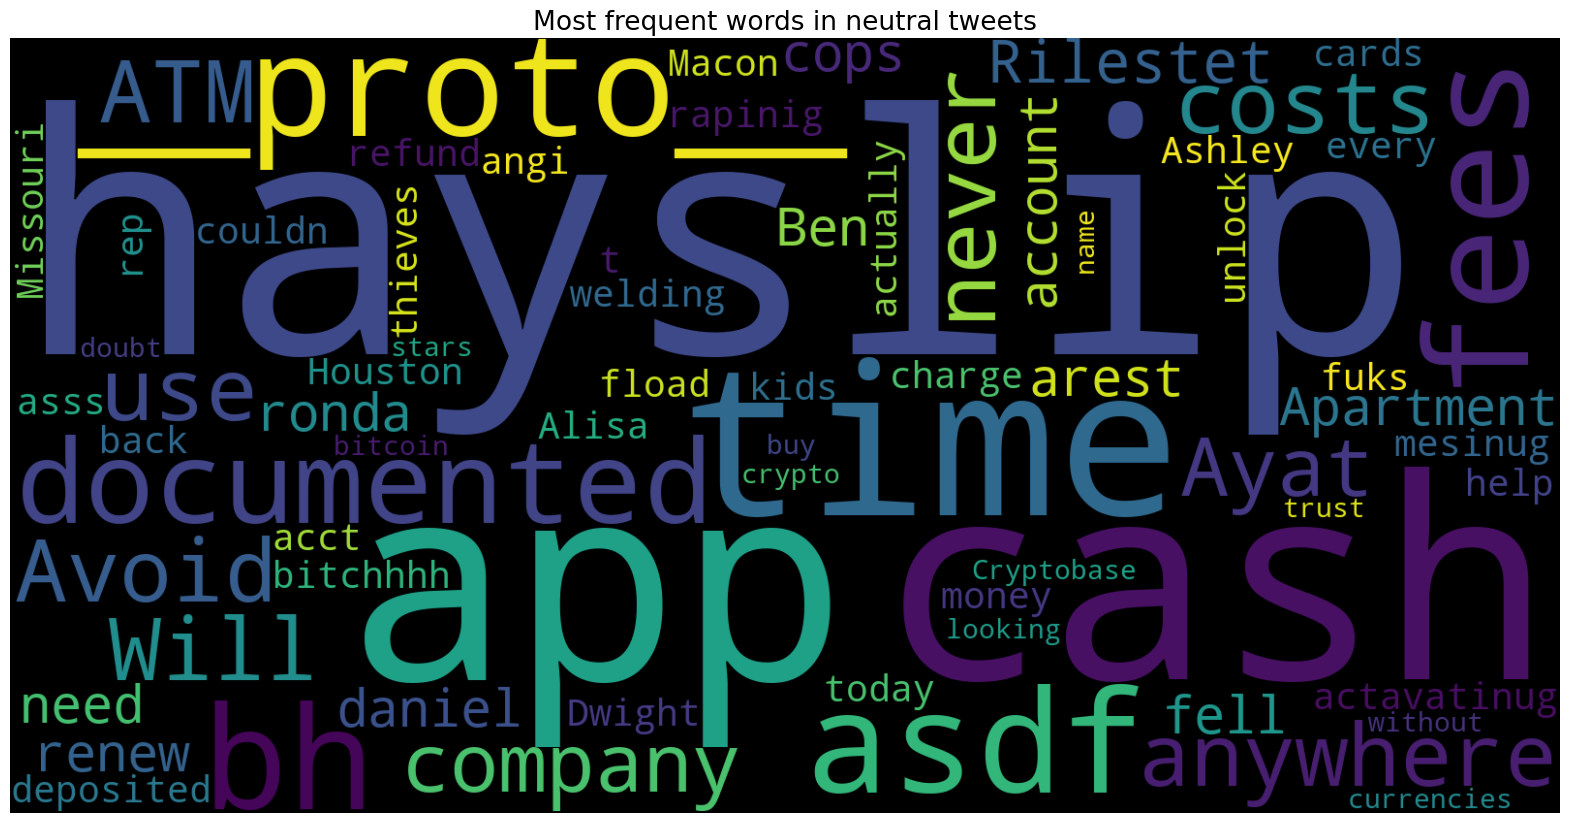

In [42]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [43]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [ ]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

In [46]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (115, 7574)
Size of y_train: (115,)
Size of x_test: (29, 7574)
Size of y_test: (29,)


In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 72.41%


In [51]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 0  8]
 [ 0 21]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         8
    Positive       0.72      1.00      0.84        21

    accuracy                           0.72        29
   macro avg       0.36      0.50      0.42        29
weighted avg       0.52      0.72      0.61        29



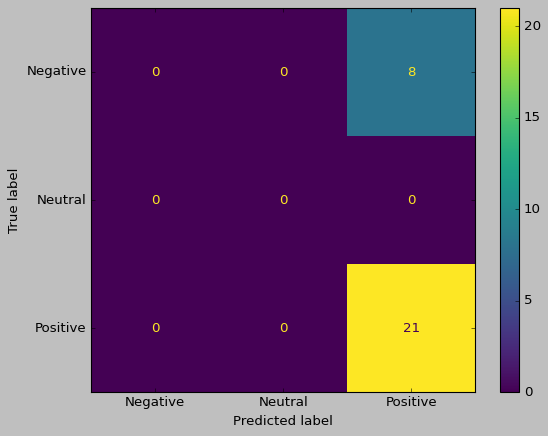

In [52]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [55]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 0.001}


In [56]:
y_pred = grid.predict(x_test)

In [57]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 72.41%


In [58]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 0  8]
 [ 0 21]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         8
    Positive       0.72      1.00      0.84        21

    accuracy                           0.72        29
   macro avg       0.36      0.50      0.42        29
weighted avg       0.52      0.72      0.61        29



In [59]:
from sklearn.svm import LinearSVC

In [60]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [61]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 72.41%


In [62]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 0  8]
 [ 0 21]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         8
    Positive       0.72      1.00      0.84        21

    accuracy                           0.72        29
   macro avg       0.36      0.50      0.42        29
weighted avg       0.52      0.72      0.61        29



In [63]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [64]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [65]:
y_pred = grid.predict(x_test)

In [66]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 72.41%


In [67]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 0  8]
 [ 0 21]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         8
    Positive       0.72      1.00      0.84        21

    accuracy                           0.72        29
   macro avg       0.36      0.50      0.42        29
weighted avg       0.52      0.72      0.61        29



Additional code to extract data form twitter using twitter api

In [ ]:
import tweepy #to access the twitter api
import pandas as pd #for basic data operations

In [ ]:
# Importing the keys from twitter api
consumerKey = "xxxxxxxxxxxxxxxxxxxx"
consumerSecret = "xxxxxxxxxxxxxxxxxxxx"
accessToken = "xxxxxxxxxxxxxxxxxxxx"
accessTokenSecret = "xxxxxxxxxxxxxxxxxxxx"

In [ ]:
# Establish the connection with twitter API
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
# Search for the Term and define number of tweets 
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

In [ ]:
# Get no of tweets and searched term together 
tweets = tweepy.Cursor(api.search, q=searchTerm).items(NoOfTerms)